In [1]:
import numpy as np
from collections import defaultdict
import pandas as pd 

from plotting_tools import *

In [2]:
%config InlineBackend.print_figure_kwargs = {'dpi': 110, 'bbox_inches': 'tight'}

In [3]:
def get_travel_times_matrix(df):

    df.columns = df.columns.str.strip()
    df.iloc[:,0] = df.iloc[:,0].str.strip()

    col_pos = round(len(df.columns)/2)-1
    col1 = df.columns[col_pos][:6]
    row1_index = df.columns[col_pos][6:]
    row1 = df.columns.tolist()[col_pos+1:]
    df = df.iloc[:,:col_pos+1]
    df.rename(columns={df.columns[col_pos]: col1}, inplace=True)

    df = pd.concat([df, pd.DataFrame([row1_index]+row1, index=df.columns[:]).T])

    df.columns = [manhole_names[x] if x in manhole_names.keys() else x for x in df.columns.values.tolist()]
    df.iloc[:,0] = [manhole_names[x] if x in manhole_names.keys() else x for x in df.iloc[:,0].values]
    df = df.set_index("")
    df = df.loc[df.index.isin(manhole_names.values()), df.columns.isin(manhole_names.values())]

    df = df.reindex(index=list(manhole_names.values()),columns=list(manhole_names.values()))

    return df

In [4]:
def plot_travel_times(df, distances = [15.84, 16.18, 30.75, 22.97, 30.08, 31.19,24.50, 19.55, 17.08, 16.16, 24.53, 18.59, 2.42, 12.12, 2.74, 0]):
    travel_hours = df.iloc[:, -1] / 3600                # convert s → h
    names = df.index                                   # list of labels, same length as distances

    fig, ax = plt.subplots(figsize=(4*cm, 4*cm), dpi=300)
    ax.scatter(distances, travel_hours, label="Travel time")

    # add one label per point
    for x, y, label in zip(distances, travel_hours, names):
        ax.annotate(
            label,                         # the text
            (x, y),                        # point to label
            xytext=(0, 5),                 # “nudge” the text 5 px upward
            textcoords="offset points",
            ha="center", va="bottom",
            fontsize=8                     # keep them small
        )

    ax.set_xlabel("Distance (km)")
    ax.set_ylabel("Travel time (h)")
    ax.legend()
    plt.tight_layout()
    plt.show()


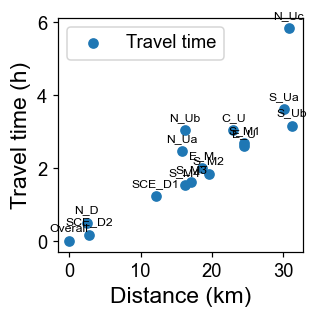

In [5]:
experiment_series = "systems_pop8"
decay_setting = "no_decay"
precipitation_setting = "Rain"
df = pd.read_csv(f"/media/iru-mls/inside/{experiment_series}/{decay_setting}_{precipitation_setting}/1_output_v4_travel_times.csv")

travel_times1 = get_travel_times_matrix(df)
plot_travel_times(travel_times1, distances = [15.84, 16.18, 30.75, 22.97, 30.08, 31.19,24.50, 19.55, 17.08, 16.16, 24.53, 18.59, 2.42, 12.12, 2.74, 0])

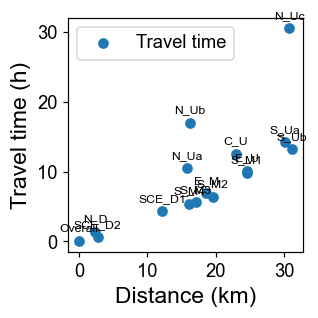

In [6]:
experiment_series = "systems_pop8"
decay_setting = "no_decay"
precipitation_setting = "noRain"
df = pd.read_csv(f"/media/iru-mls/inside/{experiment_series}/{decay_setting}_{precipitation_setting}/1_output_v4_travel_times.csv")

travel_times2 = get_travel_times_matrix(df)
plot_travel_times(travel_times2, distances = [15.84, 16.18, 30.75, 22.97, 30.08, 31.19,24.50, 19.55, 17.08, 16.16, 24.53, 18.59, 2.42, 12.12, 2.74, 0])

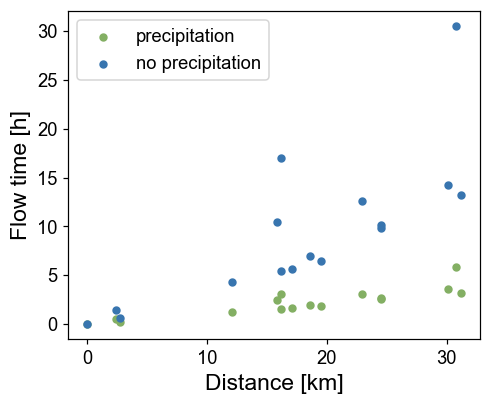

In [9]:
distances = [15.84, 16.18, 30.75, 22.97, 30.08, 31.19, 24.50, 19.55, 17.08, 16.16, 24.53, 18.59, 2.42, 12.12, 2.74, 0]

fig, ax = plt.subplots(figsize=(6*cm, 5*cm), dpi=300)
travel_hours1 = travel_times1.iloc[:, -1] / 3600
travel_hours2 = travel_times2.iloc[:, -1] / 3600
ax.scatter(distances, travel_hours1, label="precipitation", s=20, c=green)
ax.scatter(distances, travel_hours2, label="no precipitation", s=20, c=blue)

ax.set_xlabel("Distance [km]")
ax.set_ylabel("Flow time [h]")

# Place legend at the top
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=1, borderaxespad=0.)
ax.legend()

# Add more x-ticks
ax.set_xticks([0.0, 10.0, 20.0, 30.0])

plt.tight_layout()
plt.savefig(f"../plots/pop8/travel_times.png", dpi=300, bbox_inches='tight')